In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Fuzzy:
    def __init__(self, minimum=0, maximum=0):
        self.min = minimum
        self.max = maximum

    def down(self, x):
        return (self.max - x) / (self.max - self.min)

    def up(self, x):
        return (x - self.min) / (self.max - self.min)

    def rev_down(self, fuzzy_value):
        return self.max - fuzzy_value * (self.max - self.min)

    def rev_up(self, fuzzy_value):
        return fuzzy_value * (self.max - self.min) + self.min

class Speed(Fuzzy):
    def __init__(self):
        super().__init__(minimum=5, maximum=15)

    def fast(self, x):
        return 1 if x <= self.min else (0 if x >= self.max else self.down(x))

    def slow(self, x):
        return 0 if x <= self.min else (1 if x >= self.max else self.up(x))

class Quality(Fuzzy):
    def __init__(self):
        super().__init__(minimum=4, maximum=7)

    def bad(self, x):
        return 1 if x <= self.min else (0 if x >= self.max else self.down(x))

    def good(self, x):
        return 0 if x <= self.min else (1 if x >= self.max else self.up(x))

class Ambience(Fuzzy):
    def __init__(self):
        super().__init__(minimum=4, maximum=7)

    def uncomfortable(self, x):
        return 1 if x <= self.min else (0 if x >= self.max else self.down(x))

    def comfortable(self, x):
        return 0 if x <= self.min else (1 if x >= self.max else self.up(x))

class Happiness(Fuzzy):
    def __init__(self):
        super().__init__(minimum=39, maximum=100)

    def not_happy(self, fuzzy_value):
        return self.rev_down(fuzzy_value)

    def very_happy(self, fuzzy_value):
        return self.rev_up(fuzzy_value)

rule_map = {
    ("fast", "good", "comfortable"): "very_happy",
    ("fast", "bad", "uncomfortable"): "not_happy",
    ("slow", "good", "comfortable"): "not_happy",
    ("slow", "bad", "uncomfortable"): "not_happy",
    ("fast", "good", "uncomfortable"): "not_happy",
}

speed_value = 10
quality_value = 8
ambience_value = 6

speed = Speed()
quality = Quality()
ambience = Ambience()
happiness = Happiness()

real_fuzzy_sum, fuzzy_sum = 0, 0

for k, v in rule_map.items():
    fuzzy_speed = getattr(speed, k[0])(speed_value)
    fuzzy_quality = getattr(quality, k[1])(quality_value)
    fuzzy_ambience = getattr(ambience, k[2])(ambience_value)

    fuzzy_output = min(fuzzy_speed, fuzzy_quality, fuzzy_ambience)
    real_output = getattr(happiness, v)(fuzzy_output)

    real_fuzzy_sum += fuzzy_output * real_output
    fuzzy_sum += fuzzy_output

result = int(real_fuzzy_sum / fuzzy_sum)
print(f"Tingkat kebahagiaan pelanggan: {result}")


Tingkat kebahagiaan pelanggan: 72


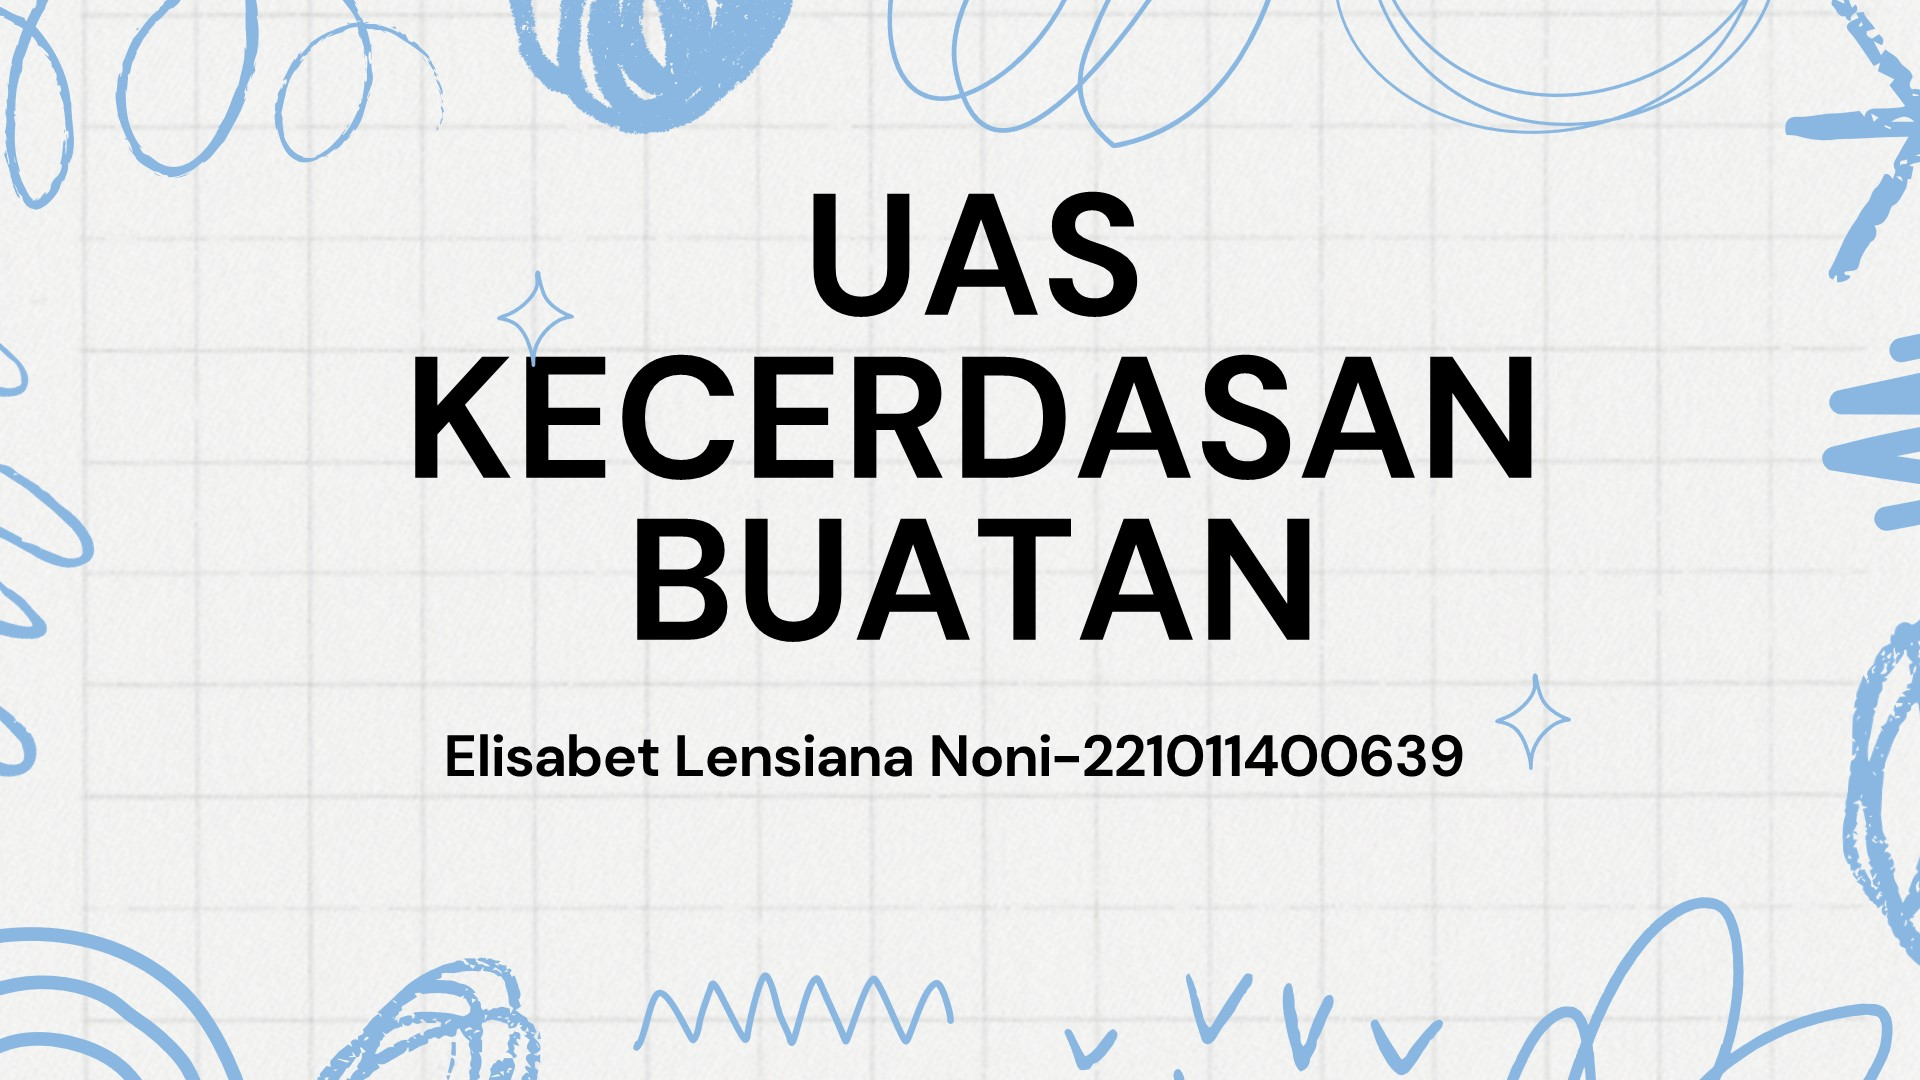

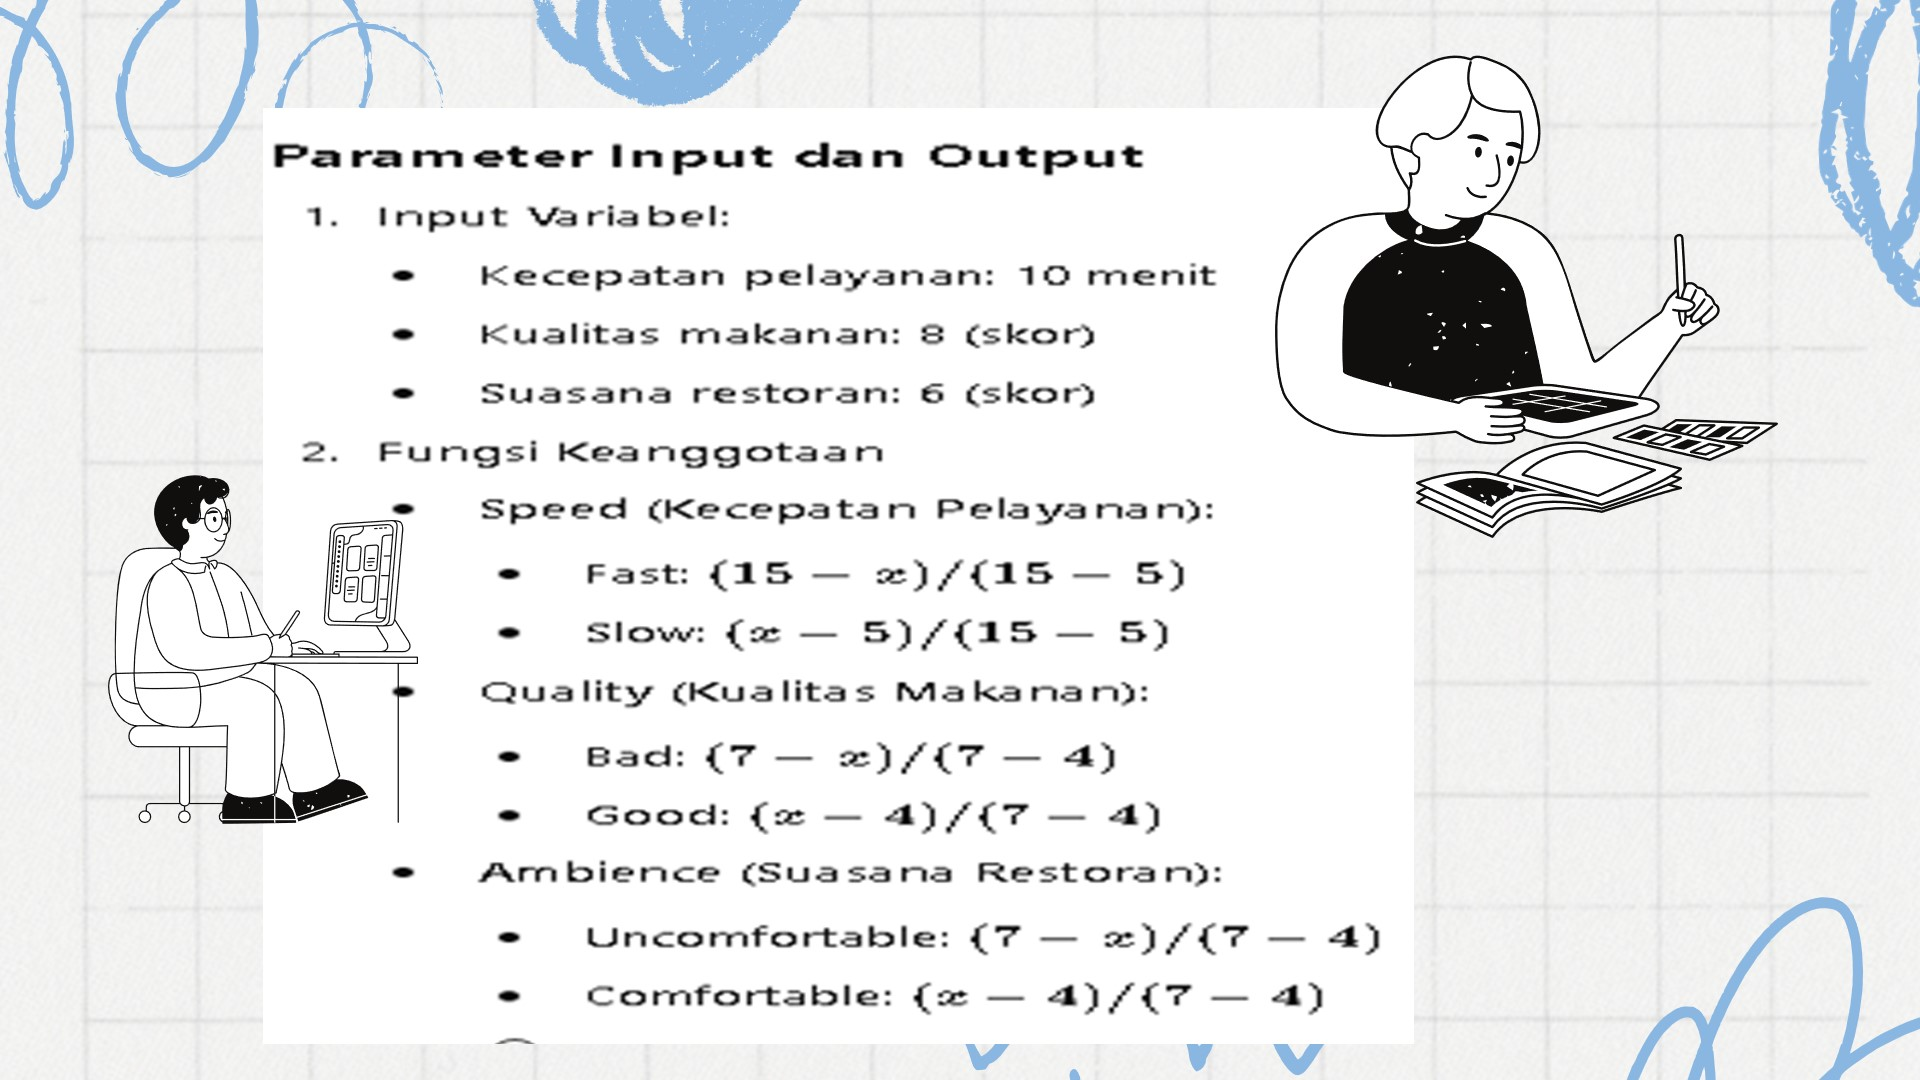

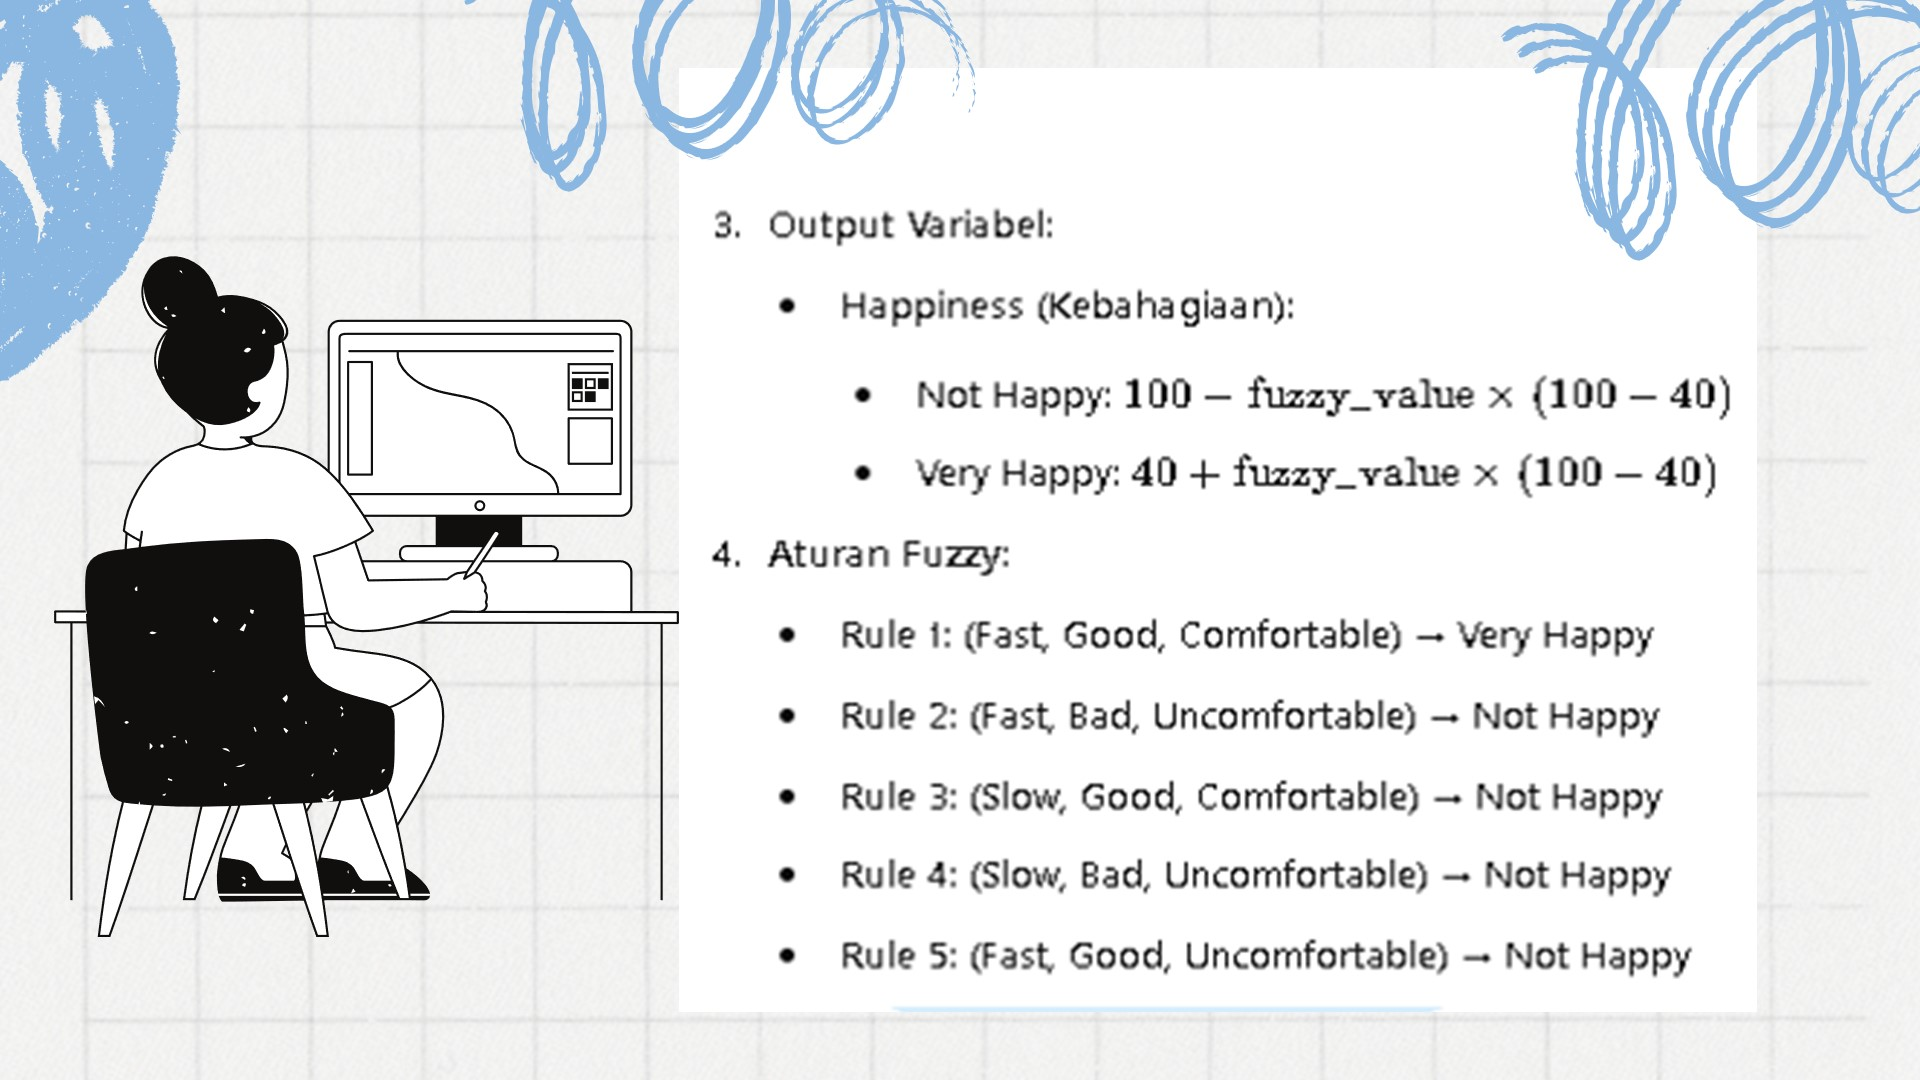

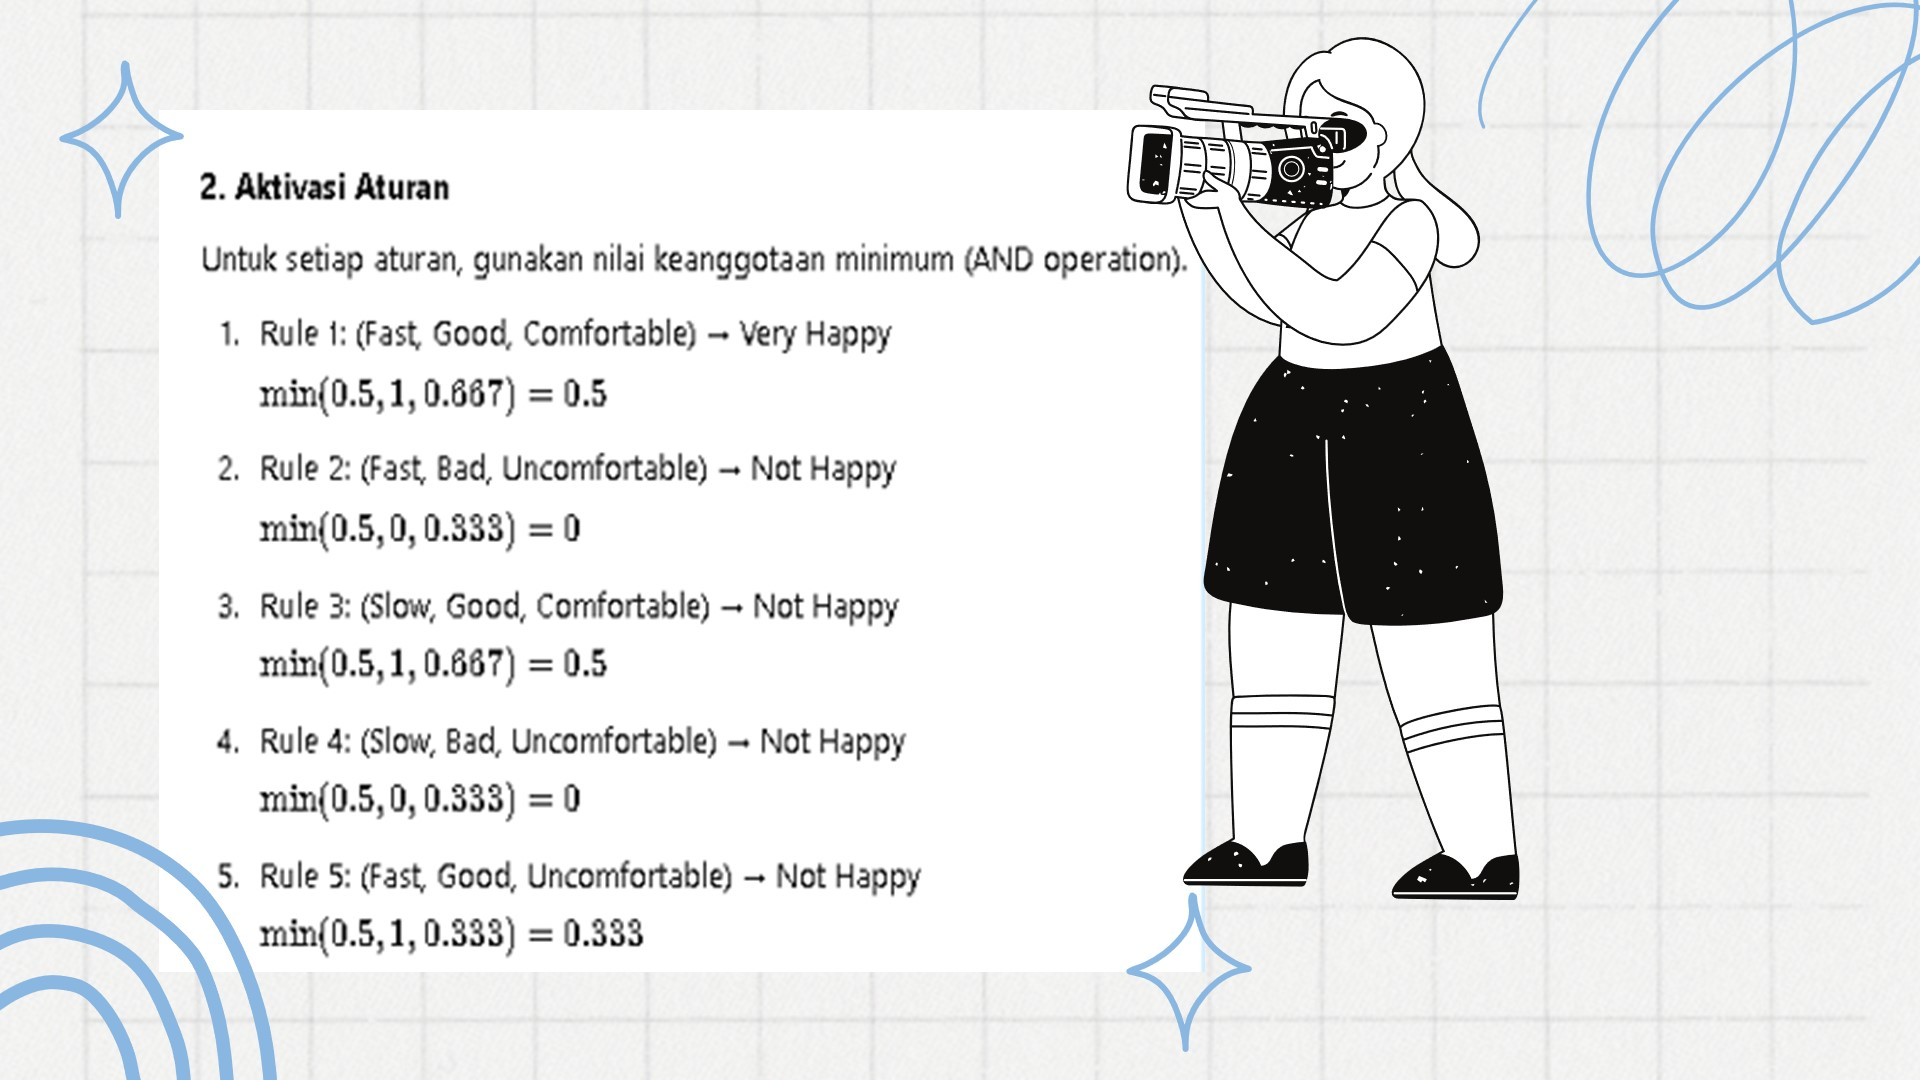

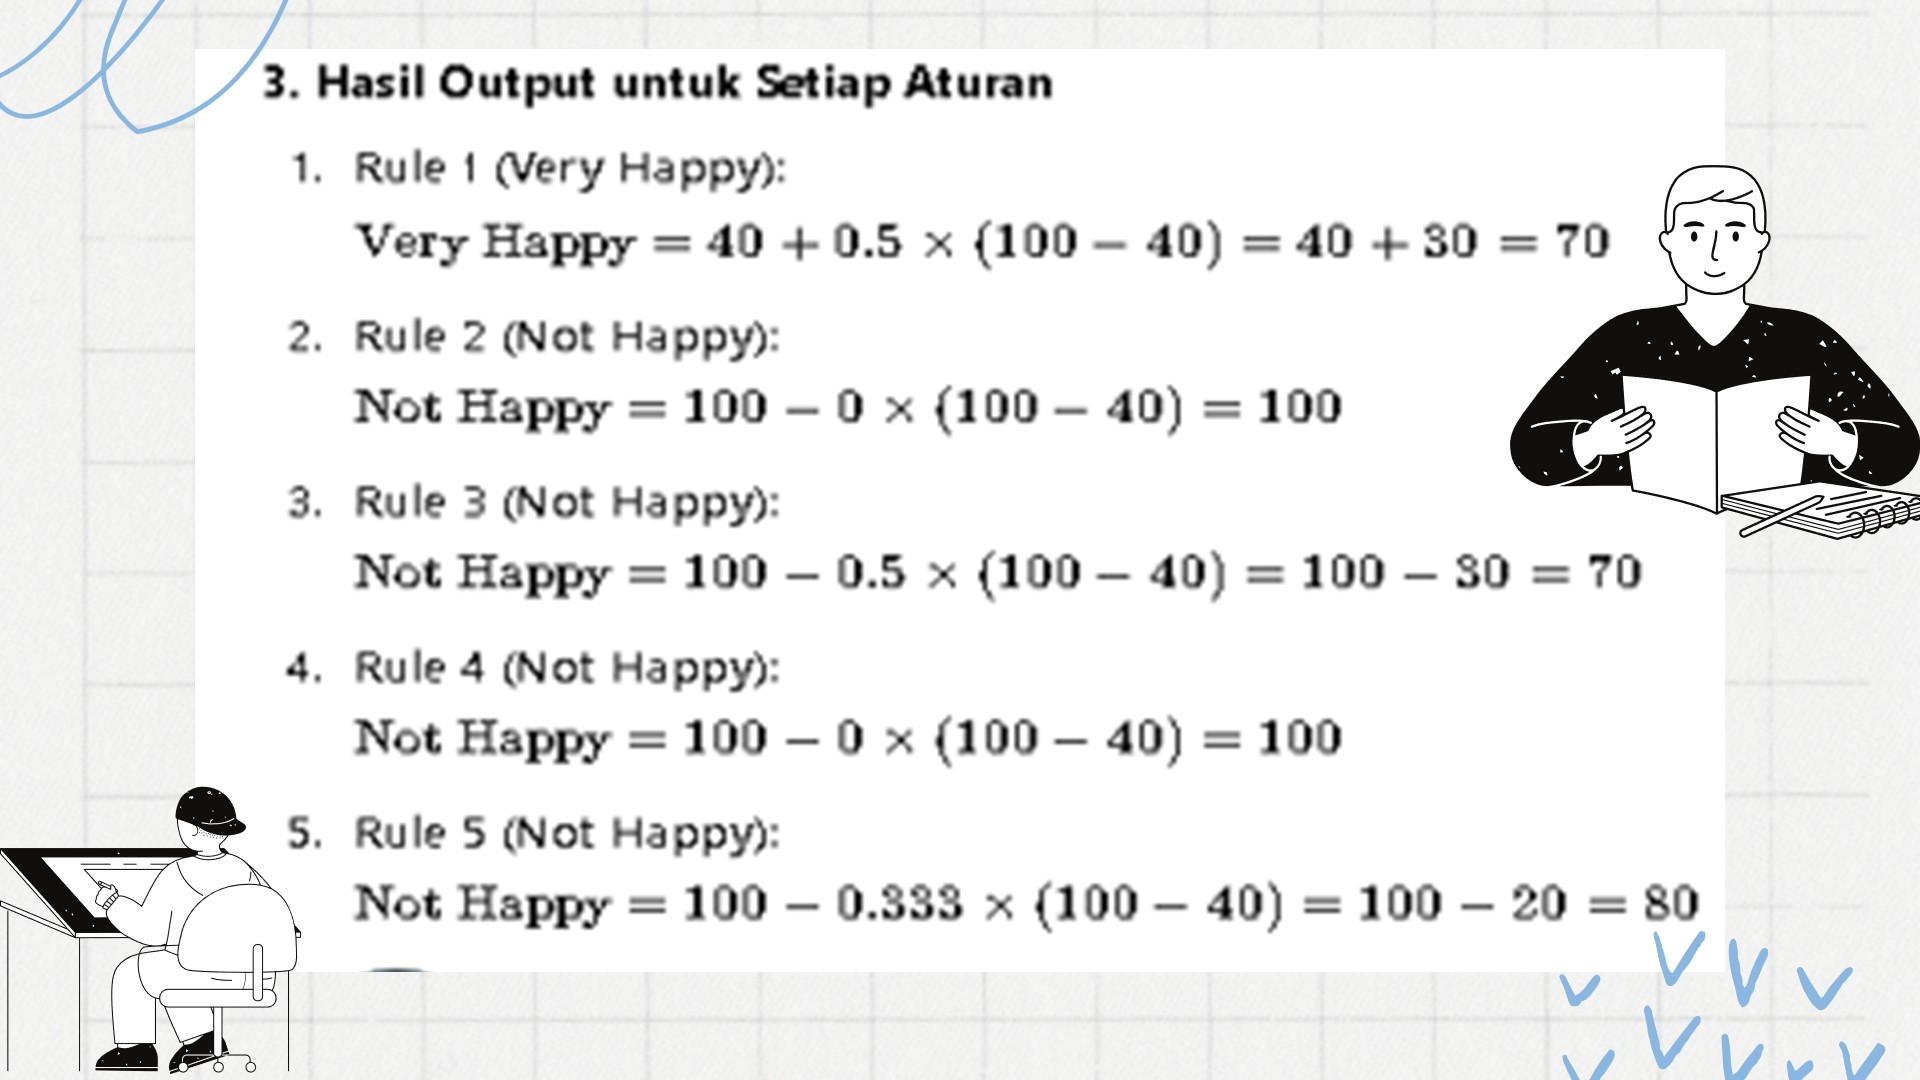

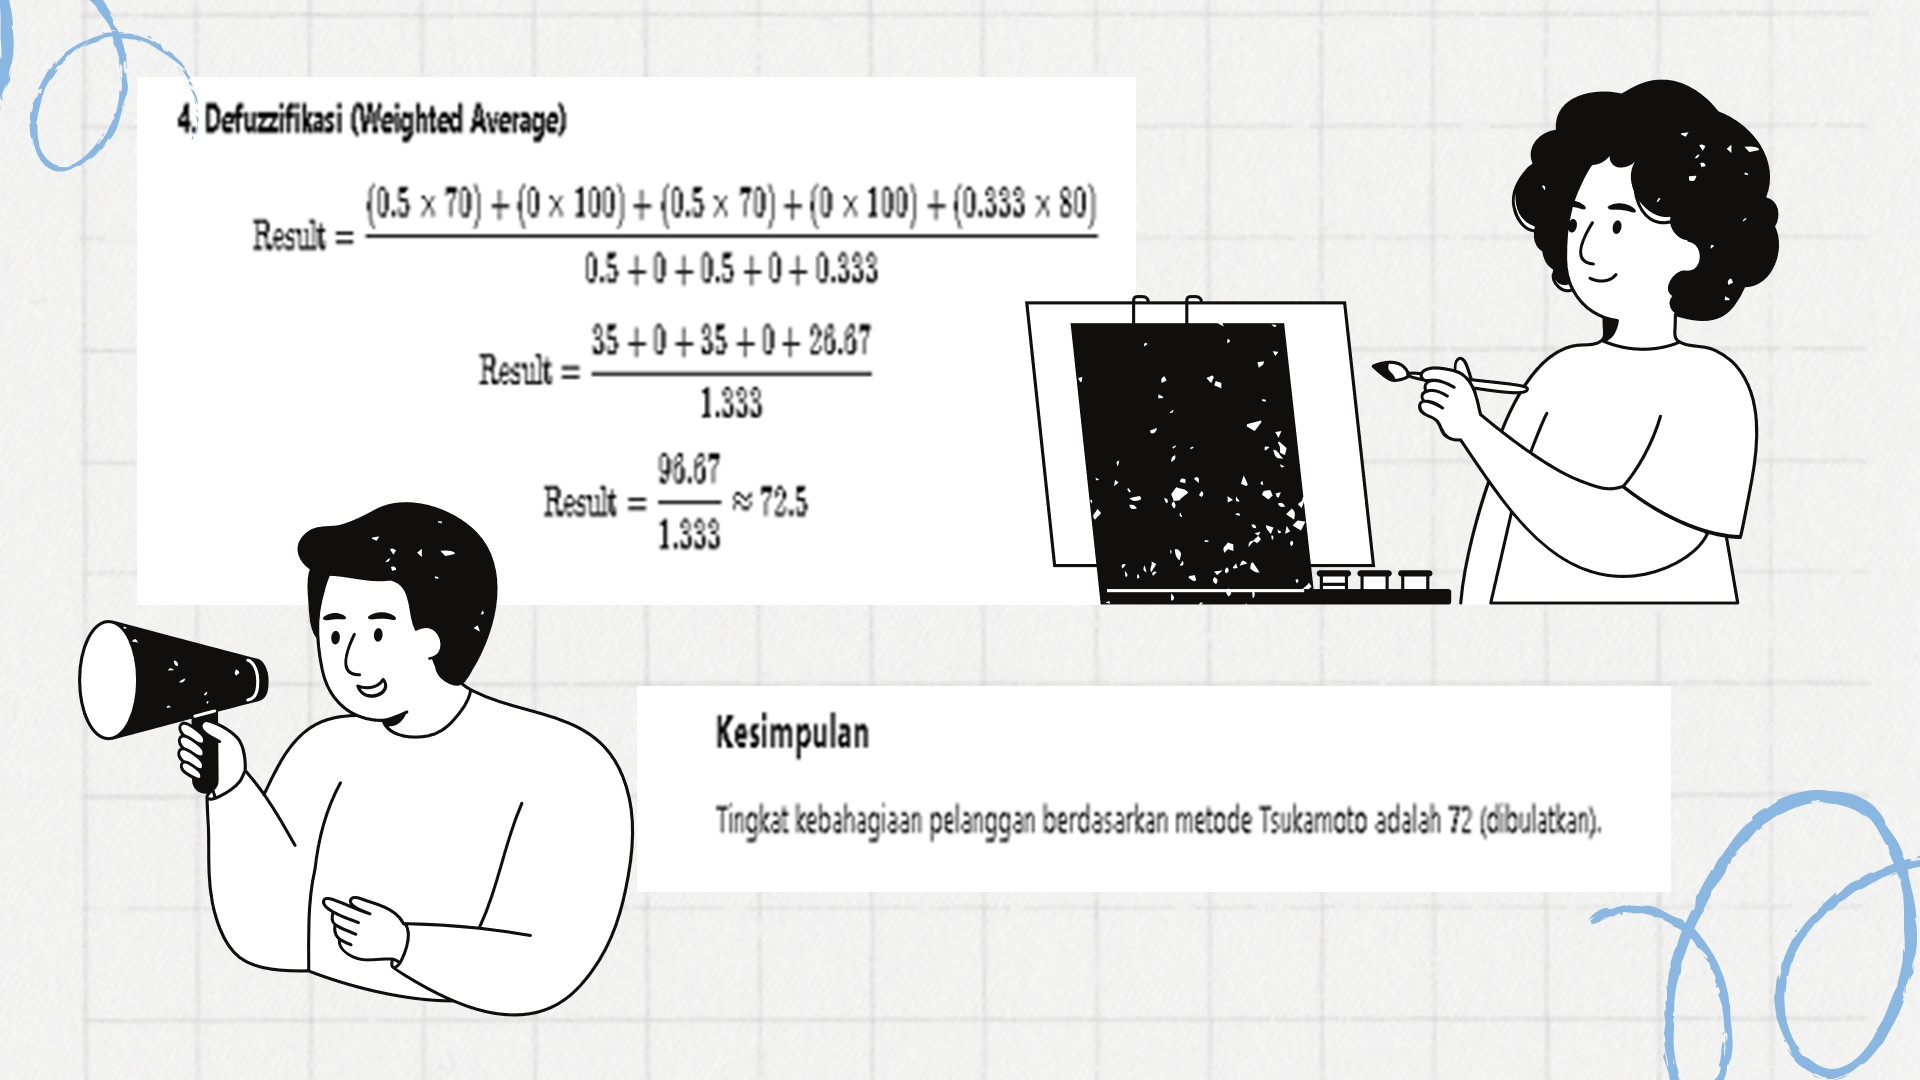

In [ ]:
# Inisialisasi objek Speed, Quality, dan Ambience
speed, quality, ambience = Speed(), Quality(), Ambience()

x, y, z = 10, 8, 6  # Kecepatan pelayanan, Kualitas makanan, Suasana restoran

# Perhitungan Keanggotaan untuk Speed (Kecepatan Pelayanan)
print(f"Himpunan fast: {speed.fast(x)}")
print(f"Himpunan slow: {speed.slow(x)}")

# Perhitungan Keanggotaan untuk Quality (Kualitas Makanan)
print(f"Himpunan bad: {quality.bad(y)}")
print(f"Himpunan good: {quality.good(y)}")

# Perhitungan Keanggotaan untuk Ambience (Suasana Restoran)
print(f"Himpunan uncomfortable: {ambience.uncomfortable(z)}")
print(f"Himpunan comfortable: {ambience.comfortable(z)}")


Himpunan fast: 0.5
Himpunan slow: 0.5
Himpunan bad: 0
Himpunan good: 1
Himpunan uncomfortable: 0.3333333333333333
Himpunan comfortable: 0.6666666666666666


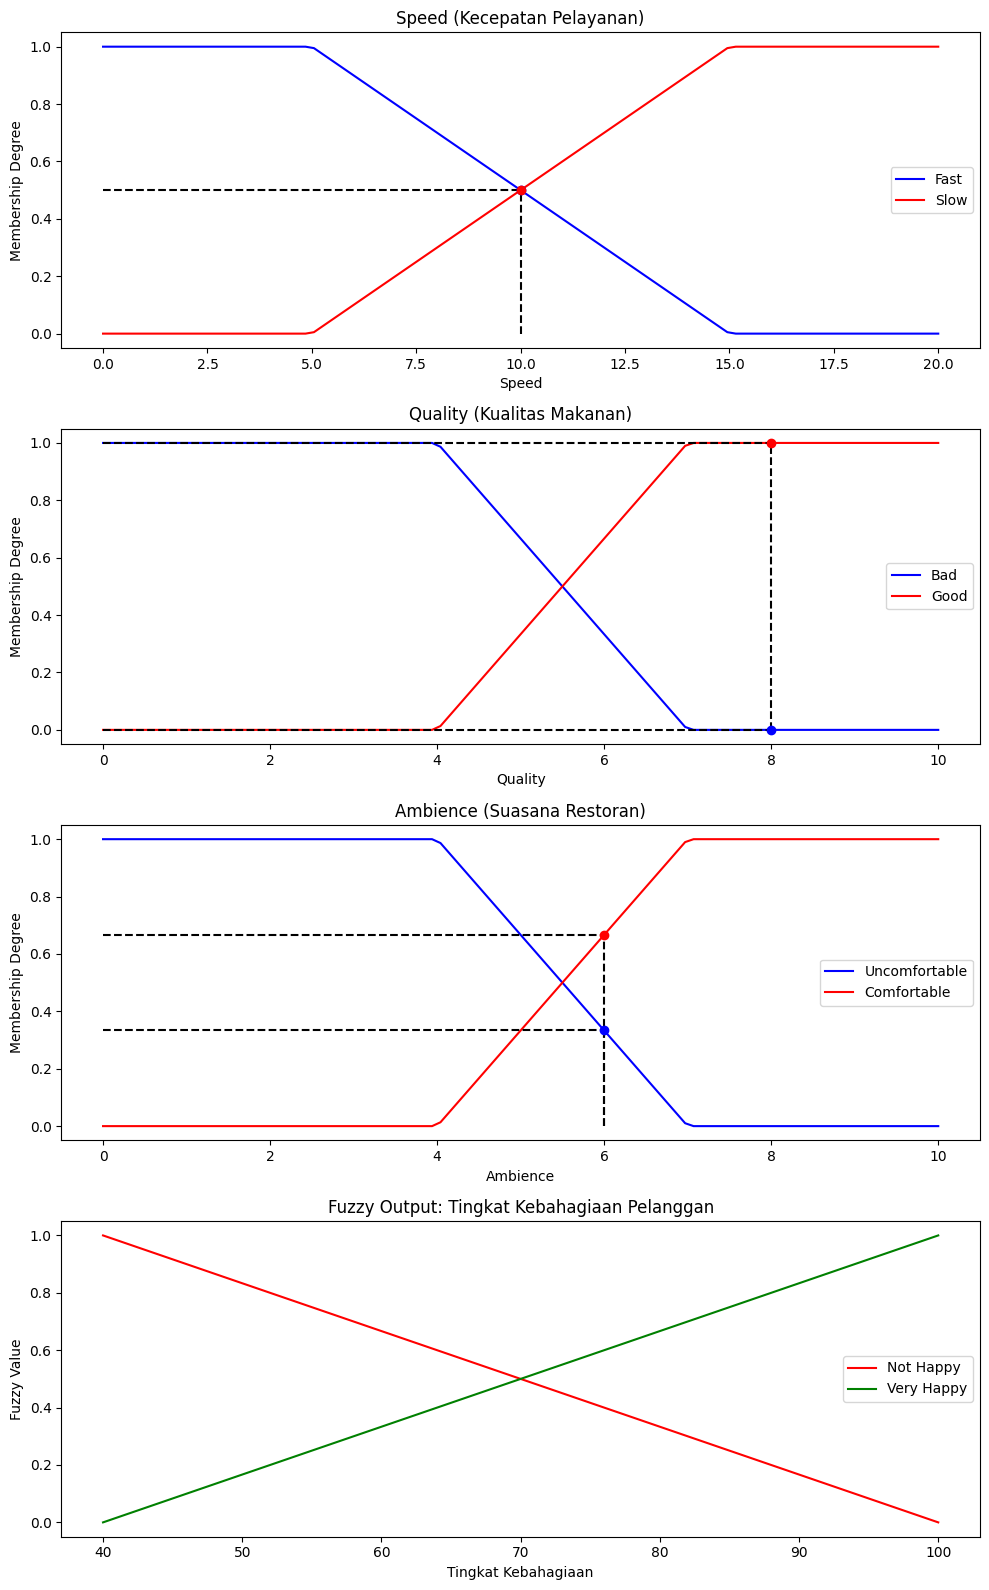

In [ ]:
class Fuzzy:
    def __init__(self, min_val, max_val):
        self.min = min_val
        self.max = max_val

    def down(self, x):
        return (self.max - x) / (self.max - self.min)

    def up(self, x):
        return (x - self.min) / (self.max - self.min)

    def rev_down(self, fuzzy_value):
        return self.max - fuzzy_value * (self.max - self.min)

    def rev_up(self, fuzzy_value):
        return fuzzy_value * (self.max - self.min) + self.min

# Kelas turunan untuk Speed, Quality, Ambience
class Speed(Fuzzy):
    def __init__(self):
        super().__init__(5, 15)

    def fast(self, x):
        if x <= self.min:
            return 1
        if x >= self.max:
            return 0
        return self.down(x)

    def slow(self, x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return self.up(x)

class Quality(Fuzzy):
    def __init__(self):
        super().__init__(4, 7)

    def bad(self, x):
        if x <= self.min:
            return 1
        if x >= self.max:
            return 0
        return self.down(x)

    def good(self, x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return self.up(x)

class Ambience(Fuzzy):
    def __init__(self):
        super().__init__(4, 7)

    def uncomfortable(self, x):
        if x <= self.min:
            return 1
        if x >= self.max:
            return 0
        return self.down(x)

    def comfortable(self, x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return self.up(x)

# Kelas Happiness
class Happiness:
    def __init__(self):
        self.min = 40
        self.max = 100

    def not_happy(self, fuzzy_value):
        return self.max - fuzzy_value * (self.max - self.min)

    def very_happy(self, fuzzy_value):
        return fuzzy_value * (self.max - self.min) + self.min

# Variabel Input Speed, Quality, Ambience
speed = Speed()
quality = Quality()
ambience = Ambience()
happiness = Happiness()

# Range untuk x (kecepatan pelayanan, kualitas, suasana restoran)
data_speed = np.linspace(0, 20, 100)
data_quality = np.linspace(0, 10, 100)
data_ambience = np.linspace(0, 10, 100)

# Data fuzzy value untuk Happiness
fuzzy_values = np.linspace(0, 1, 100)
not_happy_values = [happiness.not_happy(fv) for fv in fuzzy_values]
very_happy_values = [happiness.very_happy(fv) for fv in fuzzy_values]

fuzzy_values_adjusted = np.linspace(0, 1, 100)
adjusted_not_happy_values = [happiness.not_happy(fv) for fv in fuzzy_values_adjusted]
adjusted_very_happy_values = [happiness.very_happy(fv) for fv in fuzzy_values_adjusted]


# Plotting
fig, axs = plt.subplots(4, 1, figsize=(10, 16))

# Plot untuk Speed
axs[0].plot(data_speed, [speed.fast(x) for x in data_speed], label='Fast', color='blue')
axs[0].plot(data_speed, [speed.slow(x) for x in data_speed], label='Slow', color='red')
x = 10
axs[0].plot([0, x], [0.5, 0.5], 'k--')
axs[0].plot([x, x], [0, 0.5], 'k--')
axs[0].scatter(x, speed.fast(x), color='blue', zorder=5)
axs[0].scatter(x, speed.slow(x), color='red', zorder=5)
axs[0].set_title('Speed (Kecepatan Pelayanan)')
axs[0].set_xlabel('Speed')
axs[0].set_ylabel('Membership Degree')
axs[0].legend()

# Plot untuk Quality
axs[1].plot(data_quality, [quality.bad(x) for x in data_quality], label='Bad', color='blue')
axs[1].plot(data_quality, [quality.good(x) for x in data_quality], label='Good', color='red')
x_quality = 8
axs[1].plot([0, x_quality], [quality.bad(x_quality), quality.bad(x_quality)], 'k--')
axs[1].plot([0, x_quality], [quality.good(x_quality), quality.good(x_quality)], 'k--')
axs[1].plot([x_quality, x_quality], [0, quality.bad(x_quality)], 'k--')
axs[1].plot([x_quality, x_quality], [0, quality.good(x_quality)], 'k--')
axs[1].scatter(x_quality, quality.bad(x_quality), color='blue', zorder=5)
axs[1].scatter(x_quality, quality.good(x_quality), color='red', zorder=5)
axs[1].set_title('Quality (Kualitas Makanan)')
axs[1].set_xlabel('Quality')
axs[1].set_ylabel('Membership Degree')
axs[1].legend()

# Plot untuk Ambience
axs[2].plot(data_ambience, [ambience.uncomfortable(x) for x in data_ambience], label='Uncomfortable', color='blue')
axs[2].plot(data_ambience, [ambience.comfortable(x) for x in data_ambience], label='Comfortable', color='red')
x_ambience = 6
axs[2].plot([0, x_ambience], [ambience.uncomfortable(x_ambience), ambience.uncomfortable(x_ambience)], 'k--')
axs[2].plot([0, x_ambience], [ambience.comfortable(x_ambience), ambience.comfortable(x_ambience)], 'k--')
axs[2].plot([x_ambience, x_ambience], [0, ambience.uncomfortable(x_ambience)], 'k--')
axs[2].plot([x_ambience, x_ambience], [0, ambience.comfortable(x_ambience)], 'k--')
axs[2].scatter(x_ambience, ambience.uncomfortable(x_ambience), color='blue', zorder=5)
axs[2].scatter(x_ambience, ambience.comfortable(x_ambience), color='red', zorder=5)
axs[2].set_title('Ambience (Suasana Restoran)')
axs[2].set_xlabel('Ambience')
axs[2].set_ylabel('Membership Degree')
axs[2].legend()

# Plot untuk Happiness
axs[3].plot(adjusted_not_happy_values, fuzzy_values_adjusted, label="Not Happy", color="red")
axs[3].plot(adjusted_very_happy_values, fuzzy_values_adjusted, label="Very Happy", color="green")
axs[3].set_title("Fuzzy Output: Tingkat Kebahagiaan Pelanggan")
axs[3].set_xlabel("Tingkat Kebahagiaan")
axs[3].set_ylabel("Fuzzy Value")
axs[3].legend()

# Tampilkan plot
plt.tight_layout()
plt.show()